## BorkumRiffgrundII.py

In [5]:
!pip install py_wake

Turbine diameter[m]: 164.0
Hub height[m]: 105.0


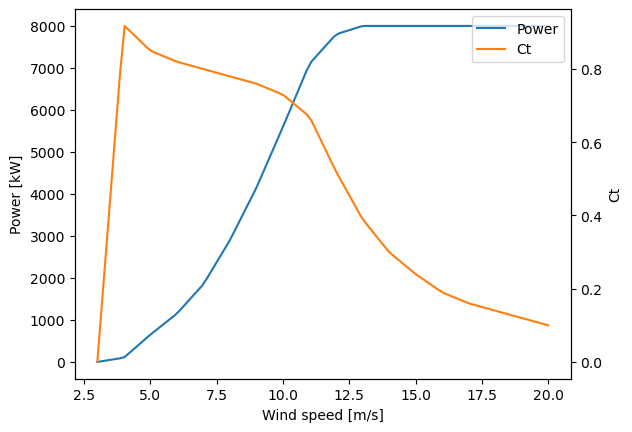

Total AEP of Borkum Riffgrund II: 2153.212415 GWh
wake loss: 98.894011 GWh per year


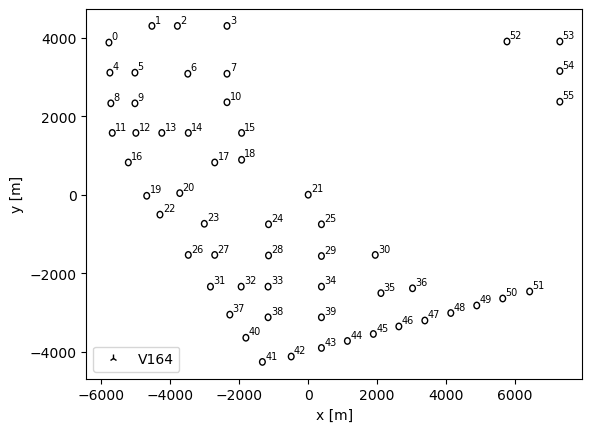

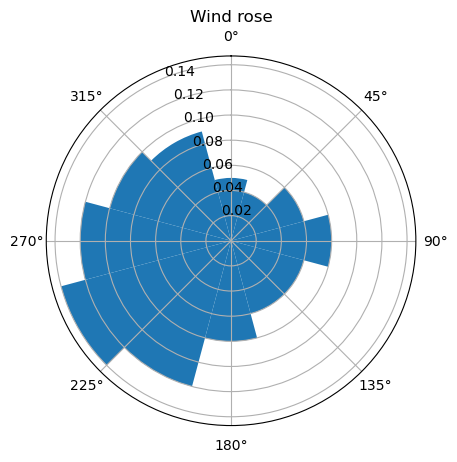

In [6]:
"""
This is a model based on the Borkum Riffgrund II offshore wind farm.
The model have been made using the already existing Hornsrev1 site as a basis, making it compatible with the PyWake tutorial.
"""
from py_wake import np
from py_wake.site._site import UniformWeibullSite
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import matplotlib.pyplot as plt
#The wind farm consists of 56 V164-8 MW wind turbines with following coordinates:
wt_x = [-5781, -4534, -3795, -2356, -5753, -5027, -3493, -2356, -5726, -5027, -2356, -5685, -5000, -4247, -3479, -1932, -5219, -2712, -1932, -4685, -3726, 0, -4301, -3014, -1151, 384, -3479, -2712, -1151, 384, 1945, -2836, -1945, -1164, 384, 2110, 3027, -2274, -1164, 384, -1808, -1329, -493, 384, 1137, 1890, 2630, 3384, 4137, 4890, 5644, 6425, 5767, 7301, 7301, 7301]
wt_y = [3877, 4301, 4301, 4301, 3110, 3110, 3082, 3082, 2329, 2329, 2356, 1575, 1575, 1575, 1575, 1575, 822, 822, 890, -27, 41, 0, -507, -740, -753, -753, -1534, -1534, -1548, -1562, -1534, -2342, - 2342, -2342, -2342, -2507, -2384, -3055, -3123, -3123, -3644, -4260, -4123, -3904, -3726, -3548, -3356, -3205, -3014, -2822, -2644, -2466, 3904, 3904, 3151, 2370]

power_curve = np.array([[3.0, 0.0],
                        [4.0, 100.0],
                        [5.0, 650.0],
                        [6.0, 1150.0],
                        [7.0, 1850.0],
                        [8.0, 2900.0],
                        [9.0, 4150.0],
                        [10.0, 5600.0],
                        [11.0, 7100.0],
                        [12.0, 7800.0],
                        [13.0, 8000.0],
                        [14.0, 8000.0],
                        [15.0, 8000.0],
                        [16.0, 8000.0],
                        [17.0, 8000.0],
                        [18.0, 8000.0],
                        [19.0, 8000.0],
                        [20.0, 8000.0],
                        [21.0, 8000.0],
                        [22.0, 8000.0],
                        [23.0, 8000.0],
                        [24.0, 8000.0],
                        [25.0, 8000.0]]) * [1, 1000]
#As the Ct-curve of the V164-8 MW wind turbine wasnt accessible a reference Ct-curve was used.
#The Ct-curve used was the one of the LW 8 MW reference wind turbine, which is a wind turbine model based on the Vestas V164-8 MW wind turbine.
#Description of an 8 MW reference wind turbine: https://iopscience.iop.org/article/10.1088/1742-6596/753/9/092013#references
ct_curve = np.array([[3, 0.0],
                     [4, 0.92],
                     [5, 0.85],
                     [6, 0.82],
                     [7, 0.80],
                     [8, 0.78],
                     [9, 0.76],
                     [10, 0.73],
                     [11, 0.67],
                     [12, 0.52],
                     [13, 0.39],
                     [14, 0.30],
                     [15, 0.24],
                     [16, 0.19],
                     [17, 0.16],
                     [18, 0.14],
                     [19, 0.12],
                     [20, 0.10],
                     [21, 0.09],
                     [22, 0.08],
                     [23, 0.07],
                     [24, 0.06],
                     [25, 0.05],
                     ])

class V164(WindTurbine):
    def __init__(self, method='linear'):
        """
        Parameters
        ----------
        method : {'linear', 'pchip'}
            linear(fast) or pchip(smooth and gradient friendly) interpolation
        """
        WindTurbine.__init__(self, name='V164', diameter=164, hub_height=105,
                             powerCtFunction=PowerCtTabular(power_curve[:, 0], power_curve[:, 1], 'w',
                                                            ct_curve[:, 1], method=method))
#The Weibull parameters are based on data from Global wind atlas at the coordinates N 54.580061°, E 6.294479°of the windfarm and height 100m and roughness 0.00.
class BorkumRiffgrund2(UniformWeibullSite):
    def __init__(self, ti=.1, shear=None):
        f = [ 5, 4, 6, 8, 6, 6, 8, 12, 14, 12, 10, 9]#This is the probability of each wind direction.""" 
        a = [8.48, 7.56, 9.29, 11.10, 11.54, 10.99, 11.28, 12.67, 12.67, 11.96, 11.54, 10.26]#This is the Weibull scaling parameters for each wind direction sector."""
        k = [2.166, 2.162, 2.178, 2.299, 2.604, 2.607, 2.002, 2.467, 2.396, 2.342, 2.568, 2.186]#This is the Weibull shape parameter for each wind direction sector."""
        UniformWeibullSite.__init__(self, np.array(f) / np.sum(f), a, k, ti=ti, shear=shear)
        self.initial_position = np.array([wt_x, wt_y]).T

def main():
    wt = V164()
    print('Turbine diameter[m]:', wt.diameter())
    print('Hub height[m]:', wt.hub_height())

    plt.figure()
    ws = np.linspace(3, 20, 100)    
    plt.plot(ws, wt.power(ws) * 1e-3, label='Power')
    c = plt.plot([], [], label='Ct')[0].get_color()
    plt.ylabel('Power [kW]')
    plt.xlabel('Wind speed [m/s]')
    ax = plt.gca().twinx()
    ax.plot(ws, wt.ct(ws), color=c)
    ax.set_ylabel('Ct')
    plt.xlabel('Wind speed [m/s]')
    plt.gcf().axes[0].legend(loc=1)
    plt.show()

if __name__ == '__main__':
    main()

wts=V164()
s = BorkumRiffgrund2
x, y = wt_x, wt_y
plt.figure()
wts.plot_xy(x,y)
plt.xlim()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

plt.figure()
BorkumRiffgrund2().plot_wd_distribution(n_wd=12);
plt.title('Wind rose')

"""
Here the AEP and wake losses of the model is calculated using the NOJ wake deficit model.
"""
from py_wake import NOJ
windTurbines = V164()
site = BorkumRiffgrund2()
noj = NOJ(site,windTurbines)
simulationResult = noj(wt_x,wt_y)
simulationResult.aep
print ("Total AEP of Borkum Riffgrund II: %f GWh"%simulationResult.aep().sum())
wf_model = NOJ(site, windTurbines)
sim_res = wf_model(x, y, # wind turbine positions
                   h=None, # wind turbine heights(defaults to the heights defined in windTurbines)
                   type=0, # Wind turbine types
                   wd=None,# Wind direction
                   ws=None,# Wind speed
                  )
sim_res
sim_res.aep()
aep_with_wake_loss = sim_res.aep().sum().data
aep_witout_wake_loss = sim_res.aep(with_wake_loss=False).sum().data
wake_loss = aep_witout_wake_loss - aep_with_wake_loss
print('wake loss: %f'%wake_loss, 'GWh per year')


## BorsseleIandII.py

SG8.0-167 DD rotor diameter[m]: 167.0
Hub heigh[m]: 116.0


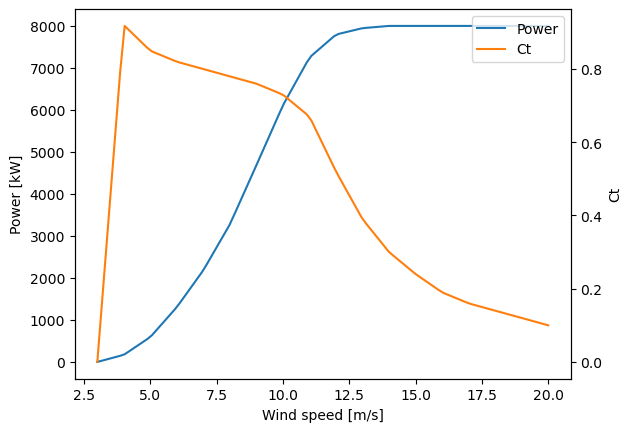

Total AEP of Borssele I & II: 3520.530385 GWh
wake loss: 120.865269 GWh per year


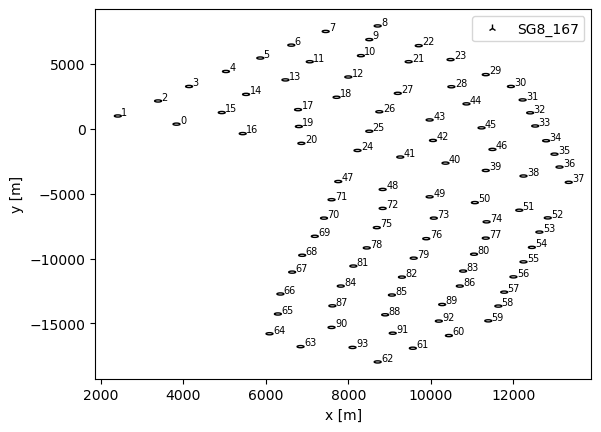

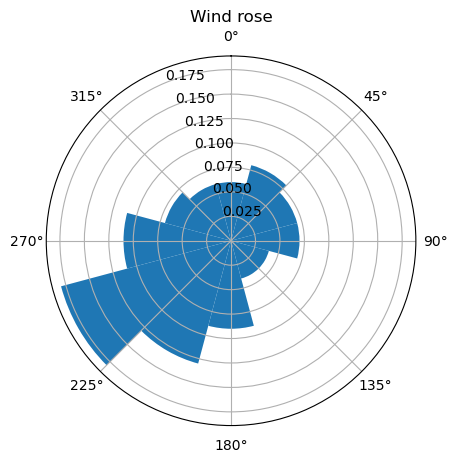

In [7]:
"""
This is a model based on the Borssele I and II offshore wind farm.
The model have been made using the already existing Hornsrev1 site as a basis, making it compatible with the PyWake tutorial.
"""
from py_wake import np
from py_wake.site._site import UniformWeibullSite
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import matplotlib.pyplot as plt
#The wind farm consists of 94 SG8.0-167 DD wind turbines with following coordinates:
wt_x = [3838, 2416, 3391, 4142, 5036, 5868, 6619, 7452, 8711, 8508, 8305, 7066, 8000, 6477, 5523, 4934, 5442, 6782, 7716, 6802, 6863, 9462, 9706, 10477, 8223, 8508, 8751, 9198, 10497, 11330, 11939, 12223, 12406, 12528, 12792, 12995, 13117, 13340, 12244, 11330, 10355, 9259, 10051, 9970, 10863, 11228, 11492, 7756, 8832, 9970, 11066, 12142, 12832, 12629, 12447, 12244, 12000, 11777, 11635, 11391, 10437, 9563, 8711, 6843, 6091, 6294, 6355, 6640, 6883, 7188, 7411, 7594, 8832, 10071, 11350, 8690, 9888, 11330, 8447, 9584, 11046, 8122, 9299, 10782, 7817, 9056, 10701, 7614, 8893, 10274, 7594, 9076, 10193, 8102]
wt_y = [365, 995, 2152, 3269, 4426, 5462, 6457, 7513, 7939, 6883, 5645, 5178, 4000, 3777, 2660, 1259, -365, 1482, 2437, 183, -1117, 5178, 6416, 5340, -1665, -183, 1320, 2741, 3249, 4183, 3269, 2234, 1239, 223, -914, -1949, -2944, -4122, -3635, -3208, -2640, -2173, -893, 690, 1929, 81, -1584, -4061, -4670, -5239, -5685, -6274, -6863, -7959, -9137, -10254, -11411, -12589, -13665, -14802, -15939, -16914, -17970, -16792, -15797, -14274, -12731, -11046, -9746, -8284, -6883, -5462, -6132, -6883, -7168, -7614, -8467, -8426, -9178, -9970, -9665, -10579, -11431, -10964, -12122, -12812, -12122, -13645, -14335, -13543, -15310, -15756, -14822, -16853]

power_curve = np.array([[3.0, 0.0],
                        [4.0, 169.0],
                        [5.0, 593.0],
                        [6.0, 1307.0],
                        [7.0, 2186.0],
                        [8.0, 3278.0],
                        [9.0, 4687.0],
                        [10.0, 6112.0],
                        [11.0, 7249.0],
                        [12.0, 7795.0],
                        [13.0, 7947.0],
                        [14.0, 8000.0],
                        [15.0, 8000.0],
                        [16.0, 8000.0],
                        [17.0, 8000.0],
                        [18.0, 8000.0],
                        [19.0, 8000.0],
                        [20.0, 8000.0],
                        [21.0, 8000.0],
                        [22.0, 8000.0],
                        [23.0, 8000.0],
                        [24.0, 8000.0],
                        [25.0, 8000.0]]) * [1, 1000]

#As the Ct-curve of the SG8.0-167 DD wind turbine wasnt accessible, a reference Ct-curve was used.
#The Ct-curve used was the one of the LW 8 MW reference wind turbine, which is a wind turbine model based on the similarly sized Vestas V164-8 MW wind turbine.
#Description of an 8 MW reference wind turbine: https://iopscience.iop.org/article/10.1088/1742-6596/753/9/092013#references
ct_curve = np.array([[3, 0.0],
                     [4, 0.92],
                     [5, 0.85],
                     [6, 0.82],
                     [7, 0.80],
                     [8, 0.78],
                     [9, 0.76],
                     [10, 0.73],
                     [11, 0.67],
                     [12, 0.52],
                     [13, 0.39],
                     [14, 0.30],
                     [15, 0.24],
                     [16, 0.19],
                     [17, 0.16],
                     [18, 0.14],
                     [19, 0.12],
                     [20, 0.10],
                     [21, 0.09],
                     [22, 0.08],
                     [23, 0.07],
                     [24, 0.06],
                     [25, 0.05],
                     ])

class SG8_167(WindTurbine):
    def __init__(self, method='linear'):
        """
        Parameters
        ----------
        method : {'linear', 'pchip'}
            linear(fast) or pchip(smooth and gradient friendly) interpolation
        """
        WindTurbine.__init__(self, name='SG8_167', diameter=167, hub_height=116,
                             powerCtFunction=PowerCtTabular(power_curve[:, 0], power_curve[:, 1], 'w',
                                                            ct_curve[:, 1], method=method))
#The Weibull parameters are data collected from Global wind atlas at the coordinates N 51.438601°, E 3.026184° of the windfarm at 100m.
class Borssele1and2(UniformWeibullSite):
    def __init__(self, ti=.1, shear=None):
        f = [6, 8, 7, 7, 4, 4, 9, 13, 18, 11, 7, 6]#This is the probability of each wind direction.""" 
        a = [8.60, 8.89, 9.52, 9.81, 9.35, 8.90, 12.26, 12.08, 12.57, 9.96, 8.95, 9.05]#This is the Weibull scaling parameters for each wind direction sector."""
        k = [2.213, 2.400, 2.732, 2.639, 3.014, 2.311, 2.592, 2.736, 2.482, 2.068, 1.889, 1.979] #This is the Weibull shape parameter for each wind direction sector."""
        UniformWeibullSite.__init__(self, np.array(f) / np.sum(f), a, k, ti=ti, shear=shear)
        self.initial_position = np.array([wt_x, wt_y]).T

def main():
    wt = SG8_167()
    print('SG8.0-167 DD rotor diameter[m]:', wt.diameter())
    print('Hub heigh[m]:', wt.hub_height())

    plt.figure()
    ws = np.linspace(3, 20, 100)    
    plt.plot(ws, wt.power(ws) * 1e-3, label='Power')
    c = plt.plot([], [], label='Ct')[0].get_color()
    plt.ylabel('Power [kW]')
    plt.xlabel('Wind speed [m/s]')
    ax = plt.gca().twinx()
    ax.plot(ws, wt.ct(ws), color=c)
    ax.set_ylabel('Ct')
    plt.xlabel('Wind speed [m/s]')
    plt.gcf().axes[0].legend(loc=1)
    plt.show()

if __name__ == '__main__':
    main()

wts=SG8_167()
s = Borssele1and2
x, y = wt_x, wt_y
plt.figure()
wts.plot_xy(x,y)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

plt.figure()
Borssele1and2().plot_wd_distribution(n_wd=12);
plt.title('Wind rose')
"""
Here the AEP and wake losses of the model is calculated using the NOJ wake deficit model.
"""
from py_wake import NOJ
windTurbines = SG8_167()
site = Borssele1and2()
noj = NOJ(site,windTurbines)
simulationResult = noj(wt_x,wt_y)
simulationResult.aep
print ("Total AEP of Borssele I & II: %f GWh"%simulationResult.aep().sum())
wf_model = NOJ(site, windTurbines)
sim_res = wf_model(x, y, # wind turbine positions
                   h=None, # wind turbine heights(defaults to the heights defined in windTurbines)
                   type=0, # Wind turbine types
                   wd=None,# Wind direction
                   ws=None,# Wind speed
                  )
sim_res
sim_res.aep()
aep_with_wake_loss = sim_res.aep().sum().data
aep_witout_wake_loss = sim_res.aep(with_wake_loss=False).sum().data
wake_loss = aep_witout_wake_loss - aep_with_wake_loss
print('wake loss: %f'%wake_loss, 'GWh per year')


## BorsseleIIIandIV.py

Turbine diameter[m]: 164.0
Hub height[m]: 109.0


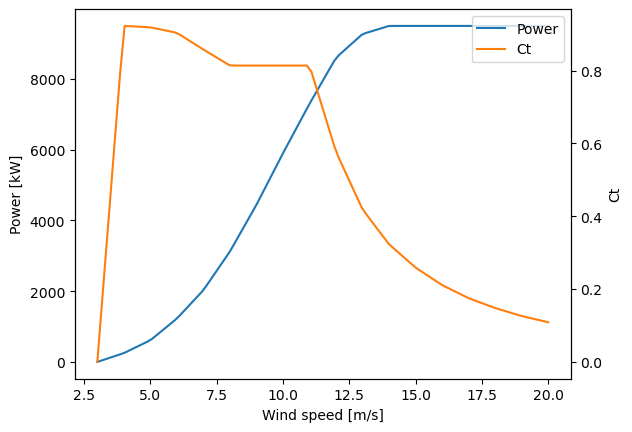

Total AEP of Borssele III & IV: 3102.867063 GWh
wake loss: 93.134457 GWh per year


NameError: name 'aep' is not defined

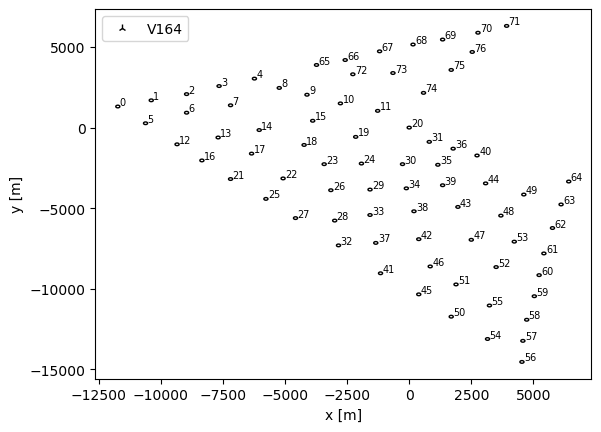

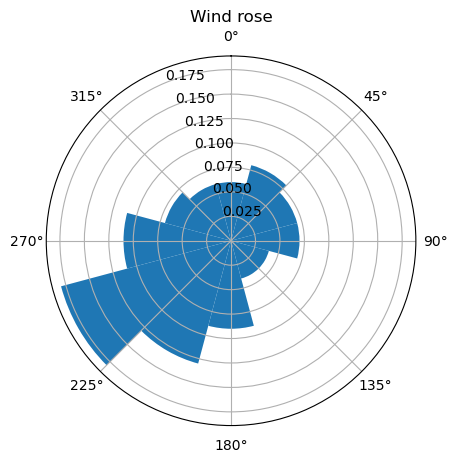

<Figure size 800x500 with 0 Axes>

In [8]:
"""
This is a model based on the Borssele III and IV offshore wind farm.
The model have been made using the already existing Hornsrev1 site as a basis, making it compatible with the PyWake tutorial.
"""
from py_wake import np
from py_wake.site._site import UniformWeibullSite
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import matplotlib.pyplot as plt
#The wind farm consists of 77 wind turbines with following coordinates:
wt_x = [-11731, -10385, -8962, -7654, -6231, -10615, -8962, -7192, -5231, -4115, -2769, -1269, -9346, -7692, -6038, -3885, -8346, -6346, -4231, -2154, 0, -7192, -5077, -3423, -1923, -5769, -3154, -4577, -3000, -1577, -269, 808, -2846, -1577, -115, 1154, 1769, -1346, 192, 1346, 2731, -1154, 385, 1962, 3077, 385, 846, 2500, 3692, 4615, 1692, 1885, 3500, 4231, 3154, 3231, 4539, 4577, 4731, 5038, 5231, 5423, 5769, 6115, 6423, -3731, -2577, -1192, 154, 1346, 2769, 3923, -2269, -654, 577, 1692, 2538]
wt_y = [1308, 1692, 2077, 2577, 3038, 269, 923, 1384, 2461, 2038, 1500, 1038, -1038, -615, -153, 423, -2038, -1615, -1077, -577, 0, -3192, -3154, -2269, -2231, -4423, -3885, -5615, -5769, -3846, -2269, -885, -7308, -5423, -3769, -2308, -1308, -7154, -5192, -3577, -1731, -9038, -6923, -4923, -3462, -10346, -8615, -6962, -5462, -4154, -11731, -9731, -8654, -7077, -13115, -11038, -14538, -13231, -11923, -10462, -9154, -7808, -6231, -4769, -3346, 3885, 4192, 4731, 5154, 5462, 5885, 6308, 3308, 3385, 2154, 3577, 4692]
power_curve = np.array([[3.0, 0.0],
                        [4.0, 249.0],
                        [5.0, 613.0],
                        [6.0, 1226.0],
                        [7.0, 2030.0],
                        [8.0, 3123.0],
                        [9.0, 4444.0],
                        [10.0, 5900.0],
                        [11.0, 7299.0],
                        [12.0, 8601.0],
                        [13.0, 9272.0],
                        [14.0, 9500.0],
                        [15.0, 9500.0],
                        [16.0, 9500.0],
                        [17.0, 9500.0],
                        [18.0, 9500.0],
                        [19.0, 9500.0],
                        [20.0, 9500.0],
                        [21.0, 9500.0],
                        [22.0, 9500.0],
                        [23.0, 9500.0],
                        [24.0, 9500.0],
                        [25.0, 9500.0]]) * [1, 1000]
#Reference Ct-curve from the DTU 10 MW turbine
#As the Ct-curve of the V164-9.5 MW wind turbine wasnt accessible a reference Ct-curve from a similar sized wind turbine already in PyWake was used.
ct_curve = np.array([[3, 0.0],
                     [4, 0.923],
                     [5, 0.919],
                     [6, 0.904],
                     [7, 0.858],
                     [8, 0.814],
                     [9, 0.814],
                     [10, 0.814],
                     [11, 0.814],
                     [12, 0.577],
                     [13, 0.419],
                     [14, 0.323],
                     [15, 0.259],
                     [16, 0.211],
                     [17, 0.175],
                     [18, 0.148],
                     [19, 0.126],
                     [20, 0.109],
                     [21, 0.095],
                     [22, 0.084],
                     [23, 0.074],
                     [24, 0.066],
                     [25, 0.059],
                     ])
class V164(WindTurbine):
    def __init__(self, method='linear'):
        """
        Parameters
        ----------
        method : {'linear', 'pchip'}
            linear(fast) or pchip(smooth and gradient friendly) interpolation
        """
        WindTurbine.__init__(self, name='V164', diameter=164, hub_height=109,
                             powerCtFunction=PowerCtTabular(power_curve[:, 0], power_curve[:, 1], 'w',
                                                            ct_curve[:, 1], method=method))
#The Weibull parameters are data collected from Global wind atlas at the coordinatesN 51.438601°, E 3.026184° of the windfarm at 100m and rougness 0.00.
class Borssele3and4(UniformWeibullSite):
    def __init__(self, ti=.1, shear=None):
        f = [6, 8, 7, 7, 4, 4, 9, 13, 18, 11, 7, 6]#This is the probability of each wind direction.""" 
        a = [8.60, 8.89, 9.52, 9.81, 9.35, 8.90, 12.26, 12.08, 12.57, 9.96, 8.95, 9.05]#This is the Weibull scaling parameters for each wind direction sector."""
        k = [2.213, 2.400, 2.732, 2.639, 3.014, 2.311, 2.592, 2.736, 2.482, 2.068, 1.889, 1.979]#This is the Weibull shape parameter for each wind direction sector."""
        UniformWeibullSite.__init__(self, np.array(f) / np.sum(f), a, k, ti=ti, shear=shear)
        self.initial_position = np.array([wt_x, wt_y]).T

        
def main():
    wt = V164()
    print('Turbine diameter[m]:', wt.diameter())
    print('Hub height[m]:', wt.hub_height())

    plt.figure()
    ws = np.linspace(3, 20, 100)    
    plt.plot(ws, wt.power(ws) * 1e-3, label='Power')
    c = plt.plot([], [], label='Ct')[0].get_color()
    plt.ylabel('Power [kW]')
    plt.xlabel('Wind speed [m/s]')
    ax = plt.gca().twinx()
    ax.plot(ws, wt.ct(ws), color=c)
    ax.set_ylabel('Ct')
    plt.xlabel('Wind speed [m/s]')
    plt.gcf().axes[0].legend(loc=1)
    plt.show()

if __name__ == '__main__':
    main()
    
wts=V164()
s = Borssele3and4()
x, y = wt_x, wt_y
plt.figure()
wts.plot_xy(x,y)
plt.xlim()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

plt.figure()
Borssele3and4().plot_wd_distribution(n_wd=12);
plt.title('Wind rose')
"""
Here the AEP and wake losses of the model is calculated using the NOJ wake deficit model.
"""
from py_wake import NOJ
windTurbines = V164()
site = Borssele3and4()
noj = NOJ(site,windTurbines)
simulationResult = noj(wt_x,wt_y)
simulationResult.aep
print ("Total AEP of Borssele III & IV: %f GWh"%simulationResult.aep().sum())
wf_model = NOJ(site, windTurbines)
sim_res = wf_model(x, y, # wind turbine positions
                   h=None, # wind turbine heights(defaults to the heights defined in windTurbines)
                   type=0, # Wind turbine types
                   wd=None,# Wind direction
                   ws=None,# Wind speed
                  )
sim_res
sim_res.aep()
aep_with_wake_loss = sim_res.aep().sum().data
aep_witout_wake_loss = sim_res.aep(with_wake_loss=False).sum().data
wake_loss = aep_witout_wake_loss - aep_with_wake_loss
print('wake loss: %f'%wake_loss, 'GWh per year')

# === AEP vs velocidad del viento ===
plt.figure(figsize=(8,5))
aep.sum(['wt','wd']).plot(marker='.')
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind speed')

# === AEP vs dirección del viento ===
plt.figure(figsize=(8,5))
aep.sum(['wt','ws']).plot(marker='.')
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind direction')

# === AEP por aerogenerador ===
plt.figure(figsize=(10,6))
aep = simulationResult.aep()
windTurbines.plot(x, y)
c = plt.scatter(x, y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

# === Wake map para un caso específico ===
wind_speed = 10
wind_direction = 270
flow_map = simulationResult.flow_map(ws=wind_speed, wd=wind_direction)

plt.figure(figsize=(18,10))
flow_map.plot_wake_map()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(f'Wake map for {wind_speed} m/s and {wind_direction}°')

# === Wake map con estilo personalizado (contourf, jet colormap) ===
plt.figure(figsize=(12,8))
flow_map.plot_wake_map(levels=10,      # número de niveles
                       cmap='jet',     # mapa de colores
                       plot_colorbar=True,
                       plot_windturbines=True)
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(f'Wake map (styled) for {wind_speed} m/s and {wind_direction}°')

plt.show()

## BorsseleWFZ.py

SG8.0-167 rotor diameter[m]: 167.0
SG8.0-167 hub height[m]: 116.0


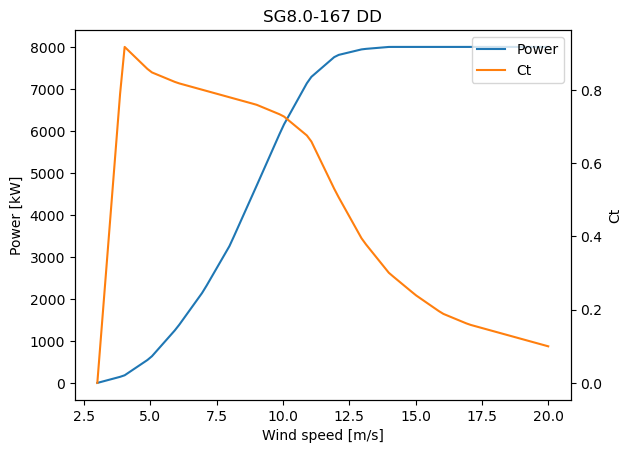

V164 rotor diameter[m]: 164.0
V164 hub height[m]: 109.0


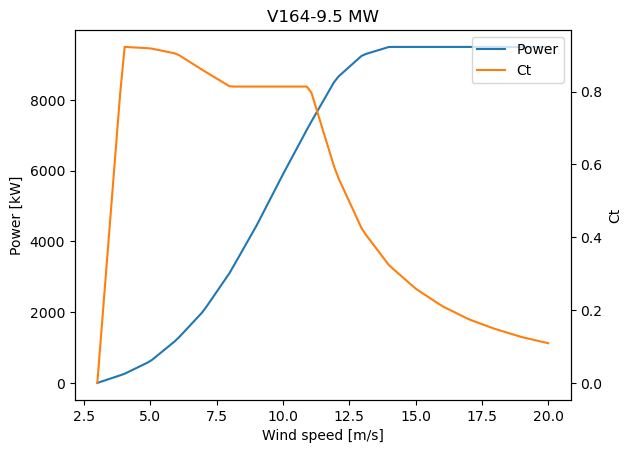

Total AEP of the Borssele wind farm zone: 6405.727481 GWh
wake loss: 218.513549 GWh per year


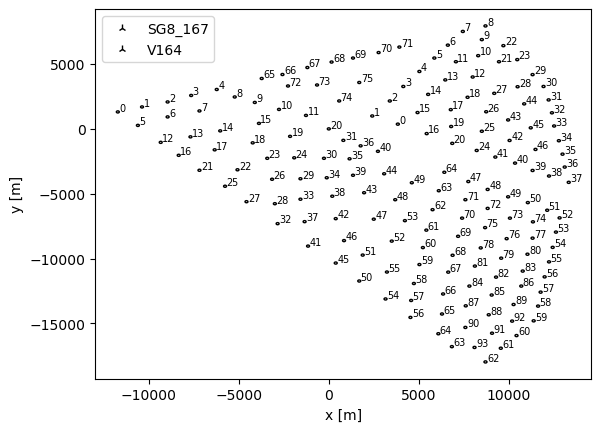

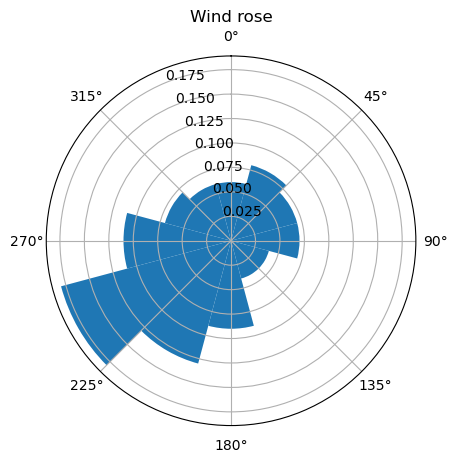

In [ ]:
"""
This is a model based on the Borssele offshore wind zone.
The model have been made using the already existing Hornsrev1 site as a basis.
"""
from py_wake import np
from py_wake.site._site import UniformWeibullSite
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import matplotlib.pyplot as plt
"""
The Borssele wind farm zone consists of two wind farms taking up two zones each and test site. In this model the two wind farms are modelled.
These two wind farms are Borssele I & II and Borssele III & IV, consisting of 94 SG8.0-167 DD and 77 V164-9.5 MW wind turbines.
The following is the coordinates of the wind turbines
"""
wt_x = [-11731, -10385, -8962, -7654, -6231, -10615, -8962, -7192, -5231, -4115, -2769, -1269, -9346, -7692, -6038, -3885, -8346, -6346, -4231, -2154, 0, -7192, -5077, -3423, -1923, -5769, -3154, -4577, -3000, -1577, -269, 808, -2846, -1577, -115, 1154, 1769, -1346, 192, 1346, 2731, -1154, 385, 1962, 3077, 385, 846, 2500, 3692, 4615, 1692, 1885, 3500, 4231, 3154, 3231, 4539, 4577, 4731, 5038, 5231, 5423, 5769, 6115, 6423, -3731, -2577, -1192, 154, 1346, 2769, 3923, -2269, -654, 577, 1692, 2538, 3838, 2416, 3391, 4142, 5036, 5868, 6619, 7452, 8711, 8508, 8305, 7066, 8000, 6477, 5523, 4934, 5442, 6782, 7716, 6802, 6863, 9462, 9706, 10477, 8223, 8508, 8751, 9198, 10497, 11330, 11939, 12223, 12406, 12528, 12792, 12995, 13117, 13340, 12244, 11330, 10355, 9259, 10051, 9970, 10863, 11228, 11492, 7756, 8832, 9970, 11066, 12142, 12832, 12629, 12447, 12244, 12000, 11777, 11635, 11391, 10437, 9563, 8711, 6843, 6091, 6294, 6355, 6640, 6883, 7188, 7411, 7594, 8832, 10071, 11350, 8690, 9888, 11330, 8447, 9584, 11046, 8122, 9299, 10782, 7817, 9056, 10701, 7614, 8893, 10274, 7594, 9076, 10193, 8102]
wt_y = [1308, 1692, 2077, 2577, 3038, 269, 923, 1384, 2461, 2038, 1500, 1038, -1038, -615, -153, 423, -2038, -1615, -1077, -577, 0, -3192, -3154, -2269, -2231, -4423, -3885, -5615, -5769, -3846, -2269, -885, -7308, -5423, -3769, -2308, -1308, -7154, -5192, -3577, -1731, -9038, -6923, -4923, -3462, -10346, -8615, -6962, -5462, -4154, -11731, -9731, -8654, -7077, -13115, -11038, -14538, -13231, -11923, -10462, -9154, -7808, -6231, -4769, -3346, 3885, 4192, 4731, 5154, 5462, 5885, 6308, 3308, 3385, 2154, 3577, 4692, 365, 995, 2152, 3269, 4426, 5462, 6457, 7513, 7939, 6883, 5645, 5178, 4000, 3777, 2660, 1259, -365, 1482, 2437, 183, -1117, 5178, 6416, 5340, -1665, -183, 1320, 2741, 3249, 4183, 3269, 2234, 1239, 223, -914, -1949, -2944, -4122, -3635, -3208, -2640, -2173, -893, 690, 1929, 81, -1584, -4061, -4670, -5239, -5685, -6274, -6863, -7959, -9137, -10254, -11411, -12589, -13665, -14802, -15939, -16914, -17970, -16792, -15797, -14274, -12731, -11046, -9746, -8284, -6883, -5462, -6132, -6883, -7168, -7614, -8467, -8426, -9178, -9970, -9665, -10579, -11431, -10964, -12122, -12812, -12122, -13645, -14335, -13543, -15310, -15756, -14822, -16853]

#This is the power curve of the V164-9.5 MW wind turbine
power_curve1 = np.array([[3.0, 0.0],
                        [4.0, 169.0],
                        [5.0, 593.0],
                        [6.0, 1307.0],
                        [7.0, 2186.0],
                        [8.0, 3278.0],
                        [9.0, 4687.0],
                        [10.0, 6112.0],
                        [11.0, 7249.0],
                        [12.0, 7795.0],
                        [13.0, 7947.0],
                        [14.0, 8000.0],
                        [15.0, 8000.0],
                        [16.0, 8000.0],
                        [17.0, 8000.0],
                        [18.0, 8000.0],
                        [19.0, 8000.0],
                        [20.0, 8000.0],
                        [21.0, 8000.0],
                        [22.0, 8000.0],
                        [23.0, 8000.0],
                        [24.0, 8000.0],
                        [25.0, 8000.0]]) * [1, 1000]
#Reference Ct-curve from the DTU 10 MW turbine
#As the Ct-curve of the V164-9.5 MW wind turbine wasnt accessible a reference Ct-curve from a similar sized wind turbine already in PyWake was used.
ct_curve1 = np.array([[3, 0.0],
                     [4, 0.92],
                     [5, 0.85],
                     [6, 0.82],
                     [7, 0.80],
                     [8, 0.78],
                     [9, 0.76],
                     [10, 0.73],
                     [11, 0.67],
                     [12, 0.52],
                     [13, 0.39],
                     [14, 0.30],
                     [15, 0.24],
                     [16, 0.19],
                     [17, 0.16],
                     [18, 0.14],
                     [19, 0.12],
                     [20, 0.10],
                     [21, 0.09],
                     [22, 0.08],
                     [23, 0.07],
                     [24, 0.06],
                     [25, 0.05],
                     ])
#This is the power curve of the SG8.0-167 DD wind turbine
power_curve2 = np.array([[3.0, 0.0],
                        [4.0, 249.0],
                        [5.0, 613.0],
                        [6.0, 1226.0],
                        [7.0, 2030.0],
                        [8.0, 3123.0],
                        [9.0, 4444.0],
                        [10.0, 5900.0],
                        [11.0, 7299.0],
                        [12.0, 8601.0],
                        [13.0, 9272.0],
                        [14.0, 9500.0],
                        [15.0, 9500.0],
                        [16.0, 9500.0],
                        [17.0, 9500.0],
                        [18.0, 9500.0],
                        [19.0, 9500.0],
                        [20.0, 9500.0],
                        [21.0, 9500.0],
                        [22.0, 9500.0],
                        [23.0, 9500.0],
                        [24.0, 9500.0],
                        [25.0, 9500.0]]) * [1, 1000]
#As the Ct-curve of the SG8.0-167 DD wind turbine wasnt accessible a reference Ct-curve was used.
#The Ct-curve used was the one of the LW 8 MW reference wind turbine, which is a wind turbine model based on the Vestas V164-8 MW wind turbine.
#Description of an 8 MW reference wind turbine: https://iopscience.iop.org/article/10.1088/1742-6596/753/9/092013#references
ct_curve2 = np.array([[3, 0.0],
                     [4, 0.923],
                     [5, 0.919],
                     [6, 0.904],
                     [7, 0.858],
                     [8, 0.814],
                     [9, 0.814],
                     [10, 0.814],
                     [11, 0.814],
                     [12, 0.577],
                     [13, 0.419],
                     [14, 0.323],
                     [15, 0.259],
                     [16, 0.211],
                     [17, 0.175],
                     [18, 0.148],
                     [19, 0.126],
                     [20, 0.109],
                     [21, 0.095],
                     [22, 0.084],
                     [23, 0.074],
                     [24, 0.066],
                     [25, 0.059],
                     ])
class SG8_167(WindTurbine):
    def __init__(self, method='linear'):
        """
        Parameters
        ----------
        method : {'linear', 'pchip'}
            linear(fast) or pchip(smooth and gradient friendly) interpolation
        """
        WindTurbine.__init__(self, name='SG8_167', diameter=167, hub_height=116,
                             powerCtFunction=PowerCtTabular(power_curve1[:, 0], power_curve1[:, 1], 'w',
                                                            ct_curve1[:, 1], method=method))       
class V164(WindTurbine):
    def __init__(self, method='linear'):
        """
        Parameters
        ----------
        method : {'linear', 'pchip'}
            linear(fast) or pchip(smooth and gradient friendly) interpolation
        """
        WindTurbine.__init__(self, name='V164', diameter=164, hub_height=109,
                             powerCtFunction=PowerCtTabular(power_curve2[:, 0], power_curve2[:, 1], 'w',
                                                            ct_curve2[:, 1], method=method))
#The Weibull parameters are data collected from Global wind atlas at the coordinates N 51.438601°, E 3.026184° of the windfarm at 100m and roughness 0.00.
class BorsseleWfz(UniformWeibullSite):
    def __init__(self, ti=.1, shear=None):
        f = [6, 8, 7, 7, 4, 4, 9, 13, 18, 11, 7, 6] #This is the probability of each wind direction.
        a = [8.60, 8.89, 9.52, 9.81, 9.35, 8.90, 12.26, 12.08, 12.57, 9.96, 8.95, 9.05]#This is the Weibull scaling parameters for each wind direction sector.
        k = [2.213, 2.400, 2.732, 2.639, 3.014, 2.311, 2.592, 2.736, 2.482, 2.068, 1.889, 1.979]#This is the Weibull shape parameter for each wind direction sector.
        UniformWeibullSite.__init__(self, np.array(f) / np.sum(f), a, k, ti=ti, shear=shear)
        self.initial_position = np.array([wt_x[77:171], wt_y[77:171]]).T
        
      
def main():
    wt = SG8_167()
    print('SG8.0-167 rotor diameter[m]:', wt.diameter())
    print('SG8.0-167 hub height[m]:', wt.hub_height())

    plt.figure()
    ws = np.linspace(3, 20, 100)    
    plt.plot(ws, wt.power(ws) * 1e-3, label='Power')
    c = plt.plot([], [], label='Ct')[0].get_color()
    plt.ylabel('Power [kW]')
    plt.xlabel('Wind speed [m/s]')
    ax = plt.gca().twinx()
    ax.plot(ws, wt.ct(ws), color=c)
    ax.set_ylabel('Ct')
    plt.xlabel('Wind speed [m/s]')
    plt.gcf().axes[0].legend(loc=1)
    plt.title('SG8.0-167 DD')
    plt.show()

if __name__ == '__main__':
    main()

def main():
    wt = V164()
    print('V164 rotor diameter[m]:', wt.diameter())
    print('V164 hub height[m]:', wt.hub_height())

    plt.figure()
    ws = np.linspace(3, 20, 100)    
    plt.plot(ws, wt.power(ws) * 1e-3, label='Power')
    c = plt.plot([], [], label='Ct')[0].get_color()
    plt.ylabel('Power [kW]')
    plt.xlabel('Wind speed [m/s]')
    ax = plt.gca().twinx()
    ax.plot(ws, wt.ct(ws), color=c)
    ax.set_ylabel('Ct')
    plt.xlabel('Wind speed [m/s]')
    plt.gcf().axes[0].legend(loc=1)
    plt.title('V164-9.5 MW')
    plt.show()

if __name__ == '__main__':
    main()
    
wts=SG8_167()
wts2=V164()
s = BorsseleWfz()
x, y = wt_x[77:171], wt_y[77:171]
x2, y2 = wt_x[0:76], wt_y[0:76]
plt.figure()
wts.plot_xy(x,y)
wts2.plot_xy(x2,y2)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

plt.figure()
BorsseleWfz().plot_wd_distribution(n_wd=12);
plt.title('Wind rose')

"""
Here the AEP and wake losses of the model is calculated using the NOJ wake deficit model.
"""
from py_wake import NOJ
windTurbines1 = SG8_167()
site1 = BorsseleWfz()
noj1 = NOJ(site1,windTurbines1)
windTurbines2 = V164()
site2 = BorsseleWfz()
noj2 = NOJ(site2,windTurbines2)
noj = noj2 and noj1
simulationResult = noj(wt_x,wt_y)
print ("Total AEP of the Borssele wind farm zone: %f GWh"%simulationResult.aep().sum())
wf_model = noj
x, y = wt_x, wt_y
sim_res = wf_model(x,y)
sim_res
sim_res.aep()
aep_with_wake_loss = sim_res.aep().sum().data
aep_witout_wake_loss = sim_res.aep(with_wake_loss=False).sum().data
wake_loss = aep_witout_wake_loss - aep_with_wake_loss
print('wake loss: %f'%wake_loss, 'GWh per year')


## HornseaProject2.py

SG8.0-167 DD rotor diameter[m]: 167.0
Hub height[m]: 116.0


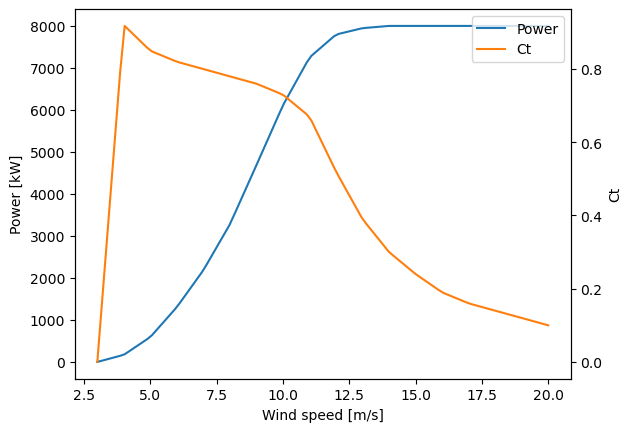

Total AEP of Hornsea Project 2: 6667.869365 GWh
wake loss: 163.584117 GWh per year


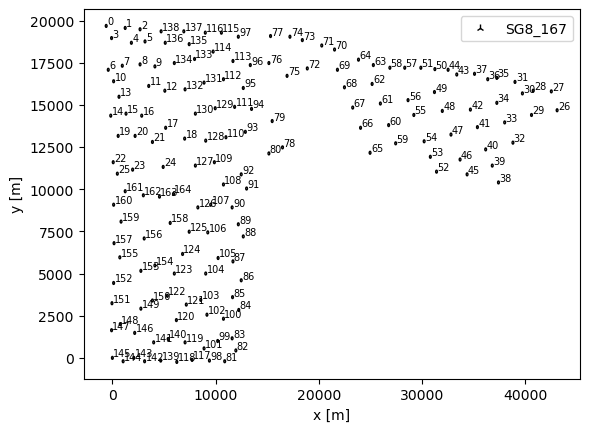

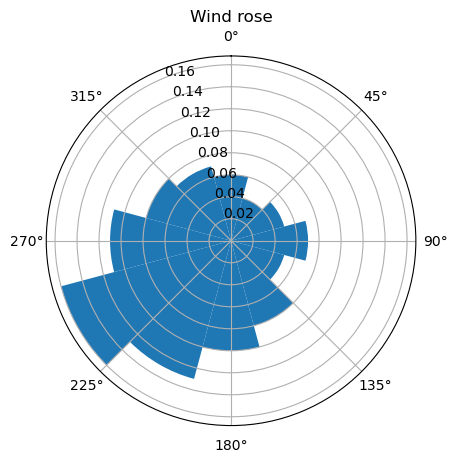

In [ ]:
"""
This is a model based on the Hornsea Project 2 offshore wind farm.
The model have been made using the already existing Hornsrev1 site as a basis, making it compatible with the PyWake tutorial.
"""
from py_wake import np
from py_wake.site._site import UniformWeibullSite
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import matplotlib.pyplot as plt
#The wind farm consists of 165 SG8.0-167 DD wind turbines with following coordinates.
wt_x = [-600,	1240,	2680,	-80,	1840,	3160,	-400,	960,	2680,	4120,	120,	3520,	5080,	640,	-160,	1320,	2840,	5160,	7000,	560,	2200,	3880,	80,	1960,	4920,	480,	43080,	42520,	40760,	40600,	39720,	39000,	38800,	38000,	37240,	37240,	36360,	35080,	37400,	36800,	36160,	35360,	34680,	33360,	32520,	34360,	33680,	32800,	31960,	31200,	31240,	29880,	31400,	30800,	30200,	29200,	28640,	28320,	26880,	27440,	26760,	25960,	25160,	25280,	23840,	24960,	24040,	23280,	22480,	21800,	21520,	20280,	18880,	18400,	17200,	16920,	15160,	15320,	16480,	15480,	15160,	10880,	11960,	11600,	12240,	11640,	12480,	11680,	12680,	12200,	11600,	13000,	12480,	12880,	13480,	12680,	13360,	12200,	9400,	10200,	10760,	8880,	9160,	8560,	9040,	10240,	9240,	9520,	10760,	9880,	11000,	11840,	10760,	11680,	9760,	10560,	9000,	7720,	6240,	7040,	6200,	7160,	5320,	6000,	6800,	7440,	8280,	8040,	9040,	9960,	8040,	8880,	7040,	7960,	6000,	7440,	5120,	6920,	4720,	4680,	5400,	4000,	3120,	2080,	1040,	0,	2160,	-80,	760,	2760,	3880,	-40,	120,	2760,	4120,	720,	3080,	160,	5600,	840,	120,	1240,	3000,	4560,	5920]
wt_y = [19680,	19560,	19480,	18960,	18680,	18760,	17080,	17320,	17400,	17280,	16400,	16120,	15840,	15480,	14360,	14480,	14360,	13640,	13000,	13160,	13160,	12800,	11600,	11160,	11320,	10920,	14680,	15800,	15840,	14400,	15680,	16360,	12760,	13960,	15120,	16600,	16520,	16840,	10400,	11400,	12360,	13680,	14720,	16800,	17080,	10880,	11760,	13240,	14640,	15760,	17120,	17200,	11040,	11920,	12840,	14400,	15280,	17200,	17200,	12720,	13800,	15080,	16240,	17360,	17680,	12160,	13640,	14840,	16040,	17080,	18280,	18520,	17160,	18840,	19040,	16720,	17480,	19080,	12480,	14040,	12120,	-200,	440,	1160,	2840,	3600,	4600,	5720,	7200,	7920,	8920,	10040,	10880,	13400,	14760,	16000,	17360,	19040,	-160,	1000,	2320,	560,	2560,	3440,	5000,	5920,	7440,	9080,	10280,	11600,	13080,	14880,	16520,	17600,	18160,	19280,	19280,	-120,	-240,	920,	2240,	3160,	3680,	5000,	6160,	7480,	8920,	11400,	12880,	14800,	14480,	16320,	15920,	17720,	17480,	18600,	18680,	19360,	19360,	-160,	1120,	920,	-200,	0,	-200,	0,	1480,	1640,	2000,	2920,	3400,	3240,	4440,	5160,	5480,	5960,	7080,	6800,	8000,	8080,	9080,	9880,	9640,	9560,	9720]

power_curve = np.array([[3.0, 0.0],
                        [4.0, 169.0],
                        [5.0, 593.0],
                        [6.0, 1307.0],
                        [7.0, 2186.0],
                        [8.0, 3278.0],
                        [9.0, 4687.0],
                        [10.0, 6112.0],
                        [11.0, 7249.0],
                        [12.0, 7795.0],
                        [13.0, 7947.0],
                        [14.0, 8000.0],
                        [15.0, 8000.0],
                        [16.0, 8000.0],
                        [17.0, 8000.0],
                        [18.0, 8000.0],
                        [19.0, 8000.0],
                        [20.0, 8000.0],
                        [21.0, 8000.0],
                        [22.0, 8000.0],
                        [23.0, 8000.0],
                        [24.0, 8000.0],
                        [25.0, 8000.0]]) * [1, 1000]

"""As the Ct-curve of the SG8.0-167 DD wind turbine wasnt accessible, a reference Ct-curve was used.
The Ct-curve used was the one of the LW 8 MW reference wind turbine, which is a wind turbine model based on the similarly sized Vestas V164-8 MW wind turbine.
Description of an 8 MW reference wind turbine: https://iopscience.iop.org/article/10.1088/1742-6596/753/9/092013#references
"""
ct_curve = np.array([[3, 0.0],
                     [4, 0.92],
                     [5, 0.85],
                     [6, 0.82],
                     [7, 0.80],
                     [8, 0.78],
                     [9, 0.76],
                     [10, 0.73],
                     [11, 0.67],
                     [12, 0.52],
                     [13, 0.39],
                     [14, 0.30],
                     [15, 0.24],
                     [16, 0.19],
                     [17, 0.16],
                     [18, 0.14],
                     [19, 0.12],
                     [20, 0.10],
                     [21, 0.09],
                     [22, 0.08],
                     [23, 0.07],
                     [24, 0.06],
                     [25, 0.05],
                     ])

class SG8_167(WindTurbine):
    def __init__(self, method='linear'):
        """
        Parameters
        ----------
        method : {'linear', 'pchip'}
            linear(fast) or pchip(smooth and gradient friendly) interpolation
        """
        WindTurbine.__init__(self, name='SG8_167', diameter=167, hub_height=116,
                             powerCtFunction=PowerCtTabular(power_curve[:, 0], power_curve[:, 1], 'w',
                                                            ct_curve[:, 1], method=method))
        
#The Weibull parameters are data collected from Global wind atlas at the coordinatesN 53.530064°, E 1.472992° of the windfarm at a height of 100m and roughness 0.00.
class Hornsea2(UniformWeibullSite):
    def __init__(self, ti=.1, shear=None):
        f = [6, 4, 5, 7, 5, 8, 10, 13, 16, 11, 8, 7]#This is the probability of each wind direction.
        a = [9.74, 8.58, 9.03, 10.06, 9.08, 10.50, 11.65, 13.18, 13.08, 11.95, 10.04, 10.25]#This is the Weibull scaling parameters for each wind direction sector.
        k = [2.557, 2.279, 2.607, 2.232, 2.037, 2.506, 2.068, 2.428, 2.760, 2.256, 2.471, 2.182]#This is the Weibull shape parameter for each wind direction sector.
        UniformWeibullSite.__init__(self, np.array(f) / np.sum(f), a, k, ti=ti, shear=shear)
        self.initial_position = np.array([wt_x, wt_y]).T

def main():
    wt = SG8_167()
    print('SG8.0-167 DD rotor diameter[m]:', wt.diameter())
    print('Hub height[m]:', wt.hub_height())

    plt.figure()
    ws = np.linspace(3, 20, 100)    
    plt.plot(ws, wt.power(ws) * 1e-3, label='Power')
    c = plt.plot([], [], label='Ct')[0].get_color()
    plt.ylabel('Power [kW]')
    plt.xlabel('Wind speed [m/s]')
    ax = plt.gca().twinx()
    ax.plot(ws, wt.ct(ws), color=c)
    ax.set_ylabel('Ct')
    plt.xlabel('Wind speed [m/s]')
    plt.gcf().axes[0].legend(loc=1)
    plt.show()

if __name__ == '__main__':
    main()

wts=SG8_167()
s = Hornsea2
x, y = wt_x, wt_y
plt.figure()
wts.plot_xy(x,y)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

plt.figure()
Hornsea2().plot_wd_distribution(n_wd=12);
plt.title('Wind rose')


"""
Here the AEP and wake losses of the model is calculated using the NOJ wake deficit model.
"""
from py_wake import NOJ
windTurbines = SG8_167()
site = Hornsea2()
noj = NOJ(site,windTurbines)
simulationResult = noj(wt_x,wt_y)
simulationResult.aep
print ("Total AEP of Hornsea Project 2: %f GWh"%simulationResult.aep().sum())
wf_model = NOJ(site, windTurbines)
sim_res = wf_model(x, y, # wind turbine positions
                   h=None, # wind turbine heights(defaults to the heights defined in windTurbines)
                   type=0, # Wind turbine types
                   wd=None,# Wind direction
                   ws=None,# Wind speed
                  )
sim_res
sim_res.aep()
aep_with_wake_loss = sim_res.aep().sum().data
aep_witout_wake_loss = sim_res.aep(with_wake_loss=False).sum().data
wake_loss = aep_witout_wake_loss - aep_with_wake_loss
print('wake loss: %f'%wake_loss, 'GWh per year')
